In [635]:
import pandas as pd
import numpy as np

store = pd.HDFStore('store.h5')
df = store['df']
df.head()

Z                                  currImage              currRect  \
0  13.85  16-06-05_17-25-17_Single_0026_frame52.img  [117, 202, 650, 736]   
0   16.7  16-06-05_17-25-17_Single_0026_frame51.img  [200, 268, 625, 701]   
0   None  16-06-05_17-25-17_Single_0026_frame50.img  [257, 317, 615, 677]   

                                           egoMotion  focal  \
0  [[0.999999578399109, -0.000895476002401953, -0...   1612   
0  [[0.9999966311214874, -0.0025956984235227477, ...   1612   
0  [[0.9999998869381259, 0.00046968847719411973, ...   1612   

                                   prevImage              prevRect  
0  16-06-05_17-25-17_Single_0026_frame51.img  [200, 268, 625, 701]  
0  16-06-05_17-25-17_Single_0026_frame50.img  [257, 317, 615, 677]  
0  16-06-05_17-25-17_Single_0026_frame49.img  [299, 351, 605, 659]

In [636]:
df.currRect

0    [117, 202, 650, 736]
0    [200, 268, 625, 701]
0    [257, 317, 615, 677]
Name: currRect, dtype: object

In [637]:
# read imgs
from MEImage import *
image = MEImage()

im_arr_obs = [(image.from_file("./images/"+c), image.from_file("./images/"+p)) for (c,p) in zip(df.currImage,df.prevImage)] 
im_arr = [(ob[0].im, ob[1].im) for ob in im_arr_obs]
im_source = [(ob[0]._origin, ob[1]._origin) for ob in im_arr_obs]


In [638]:
df.currRect.values[0]

[117, 202, 650, 736]

# Harris

In [639]:
# create sobel arrays
sobel_x =np.array([[-1,0,1],[-2, 0, 2], [-1, 0, 1]])
sobel_y = sobel_x.T

print "sobel_x:", sobel_x, "\n"
print "sobel_y:", sobel_y

sobel_x: [[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 

sobel_y: [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [640]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
ax = axes.flatten()
ax[0].imshow(im_arr[0][0], cmap = "gray", origin='lower')
ax[1].imshow(dx, cmap = "gray", origin='lower')
ax[2].imshow(dy, cmap = "gray", origin='lower')

In [783]:
from scipy.ndimage.filters import maximum_filter

def harris_mat(im, windowSize, k, threshold):
   # window_arr = np.ones(window_dim)

    new_image = im.copy()
    dx = sg.convolve2d(im,sobel_x,"same")
    dy = sg.convolve2d(im,sobel_y,"same")   
    Ixy = dx*dy
    Ixx = dx**2
    Iyy = dy**2     
    w,h = Ixx.shape[0], Ixx.shape[1]


    offset = windowSize/2
    
    corner_list = []
    for x in range(0,w):
        for y in range(0,h):
            
            sum_ixx = Ixx[x-offset:x+offset+1,y-offset:y+offset+1].sum()
            sum_ixy = Ixy[x-offset:x+offset+1,y-offset:y+offset+1].sum()
            sum_iyy = Iyy[x-offset:x+offset+1,y-offset:y+offset+1].sum()      
            resp_arr = np.asarray([sum_ixx, sum_ixy, sum_ixy, sum_iyy]).reshape(2,2)
                       
            r = np.linalg.det(resp_arr) - ((k*np.trace(resp_arr))**2)
            
            new_image[x,y] = r
    
    
    r_mat = new_image * new_image == maximum_filter(new_image,5)
    
    #r_mat =  np.ma.masked_where(r_mat > threshold, r_mat)
  
    return r_mat,new_img

r_mat, new_img = harris_mat(im_window, windowSize = 3, k = .04, threshold = 10000 )


In [784]:
r_mat

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [755]:
plt.imshow(im_window, cmap = "gray", origin = "inverse")
max_corners = corner_list[r_vals.argsort()[-20:][::-1]]
plt.scatter(max_corners[:,0], max_corners[:,1], color = "red", marker = "*", s = 5) #[plt.plot(i[0],i[1], c = "red", size = 50) for i in max_corners]


In [708]:
plt.imshow(im_window, cmap = "gray", origin = "inverse")
#max_corners = corner_list[corner_list.argsort()[-20:][::-1]]
plt.scatter(corner_list[:,0], corner_list[:,1], color = "red", marker = "*", s = 5) #[plt.plot(i[0],i[1], c = "red", size = 50) for i in max_corners]


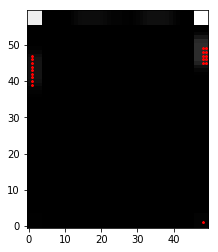

In [576]:

im_window = im_arr[0][0][600:660,300:350]

corner_list, new_img = harris_mat(im_window, windowSize = 3, k = .04, threshold = 150000 )
corner_list = np.asarray(corner_list)
#max_corners = corner_list[corner_list[:,2].argsort()[-20:][::-1]]

# plt.imshow(new_img, cmap = "gray", origin='lower')
# plt.scatter(max_corners[:,0], max_corners[:,1], color = "red", marker = "*", s = 5) #[plt.plot(i[0],i[1], c = "red", size = 50) for i in max_corners]


In [525]:
len(max_corners)

10

In [368]:
plt.imshow(im_arr[0], cmap = "gray", origin='lower')

plt.scatter(max_corners[:,0], max_corners[:,1], color = "red", marker = "*", s = 50) #[plt.plot(i[0],i[1], c = "red", size = 50) for i in max_corners]


In [338]:
max_corners[0][1]

957.0

In [ ]:
corner_list.sum()

In [277]:
resp_pixels = np.asarray(resp_pixels).reshape(w,h)
resp_pixels.shape

(960, 1280)

In [298]:
sum(ix_iy[499:502 ,499:502])

array([ -5.      , -10.390625, -12.90625 ])

In [140]:
sum(ix_iy[499:502 ,499:502 ].ravel())

-28.296875

In [77]:
window = np.ones((3,3))

In [306]:
window[-1:2,:]

array([], shape=(0, 3), dtype=float64)

In [94]:
window[0:1]

array([[1., 1., 1.]])

In [73]:
sum(sum_pixels[500:503, 500:503].ravel())

-9.84375

In [74]:
sum(ix_iy[500:503, 500:503].ravel())

-4.21875

In [23]:
w,h = im_arr[0].shape[0], im_arr[0].shape[1]

def conv_sum()
for row in range(0,w):
    for col in range(0,h):
        im[0]

(960, 1280)